In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from skimage import morphology as morp
import scipy.ndimage as snd
import math

# Morphological Operators

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Text(0.5, 1.0, 'Morphologically Closed')

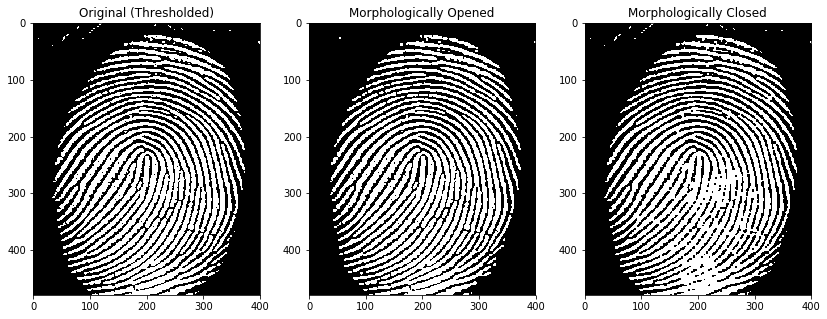

In [2]:
fp = cv2.imread("img/FingerPrint.jpg", cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(fp, 127, 255, cv2.THRESH_BINARY_INV)

se = morp.square(3, dtype='uint8')
print(se)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, se)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, se)
e = cv2.erode(thresh, se, 1)

fig = plt.figure(figsize = (14,5))
plt.subplot(131)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original (Thresholded)")
plt.subplot(132)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_RGB2BGR))
plt.title("Morphologically Opened")
plt.subplot(133)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_RGB2BGR))
plt.title("Morphologically Closed")

## Manipulating Images

Text(0.5, 1.0, 'Coins (Thresholded)')

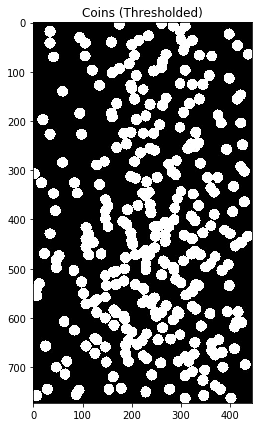

In [3]:
coins = cv2.imread("img/coins.jpg", cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(coins, 125, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize = (15,7))
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_RGB2BGR))
plt.title("Coins (Thresholded)")

### Displaying Coins near the Edge

Text(0.5, 1.0, 'Coins near Edge (Dilation of clipping)')

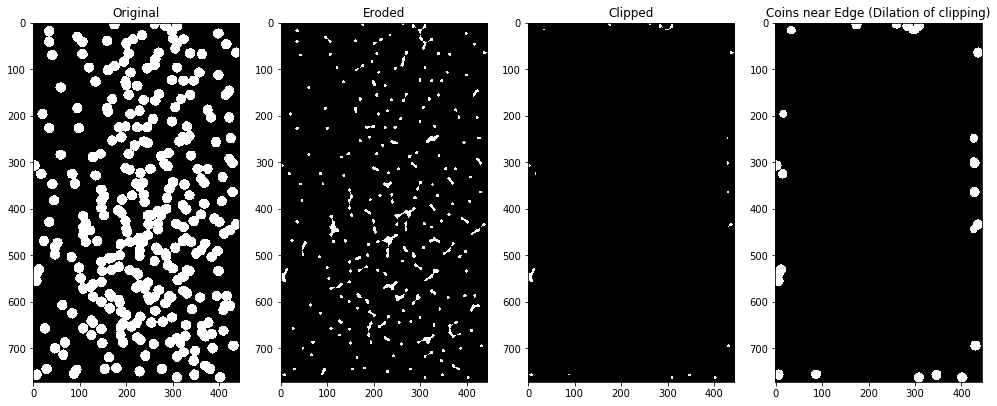

In [4]:
se = morp.disk(8, dtype='uint8')

e1 = cv2.erode(coins, se, iterations = 1)
temp1 = cv2.erode(coins, se, iterations = 1)

e1[18:e1.shape[0]-18, 18:e1.shape[1]-18] = 0

d1 = cv2.dilate(e1, se)

fig = plt.figure(figsize = (17,17))
plt.subplot(141)
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_RGB2BGR))
plt.title("Original")
plt.subplot(142)
plt.imshow(cv2.cvtColor(temp1, cv2.COLOR_RGB2BGR))
plt.title("Eroded")
plt.subplot(143)
plt.imshow(cv2.cvtColor(e1, cv2.COLOR_RGB2BGR))
plt.title("Clipped")
plt.subplot(144)
plt.imshow(cv2.cvtColor(d1, cv2.COLOR_RGB2BGR))
plt.title("Coins near Edge (Dilation of clipping)")

### Displaying Overlapping & Non-Overlapping Coins Separately

Text(0.5, 1.0, 'Non-Overlapping Coins')

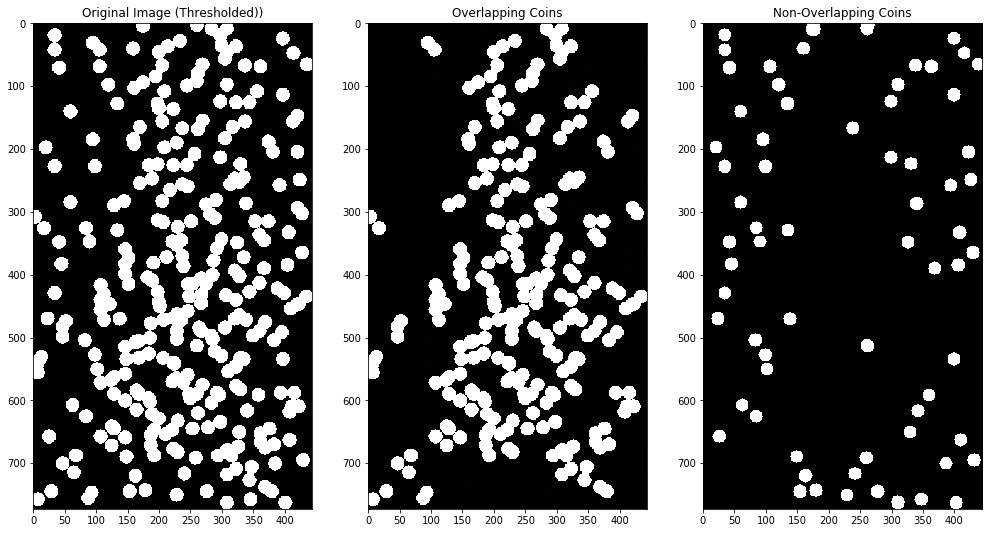

In [5]:
b = np.zeros((25,25)).astype('int')

b1 = morp.rectangle(9,9).astype('int')

b[8:17,8:17] = b1
b[0][0] = -1
b[0][len(b)-1] = -1
b[len(b)-1][0] = -1
b[len(b)-1][len(b)-1] = -1

b[0][12] = -1
b[12][0] = -1
b[len(b)-1][12] = -1
b[12][len(b)-1] = -1

e2 = cv2.morphologyEx(thresh, cv2.MORPH_HITMISS, b)
# e3 = cv2.morphologyEx(e2, cv2.MORPH_HITMISS, b2)
        
se = morp.disk(10, dtype='uint8')
d1 = cv2.dilate(e2, se)

se = morp.disk(12, dtype='uint8')
d2 = cv2.dilate(e2, se)

fig = plt.figure(figsize = (17,17))

plt.subplot(131)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original Image (Thresholded))")

plt.subplot(132)
plt.imshow(cv2.cvtColor(thresh - d2, cv2.COLOR_RGB2BGR))
plt.title("Overlapping Coins")

plt.subplot(133)
plt.imshow(cv2.cvtColor(d1, cv2.COLOR_RGB2BGR))
plt.title("Non-Overlapping Coins")

# plt.imshow(cv2.cvtColor(d1, cv2.COLOR_RGB2BGR))


## Chroma Keying

In [6]:
chroma = cv2.imread("img/chroma_img.jpg")
ck = cv2.imread("img/stadium.jpg")

### Green screen

Text(0.5, 1.0, 'Chroma-keyed Image')

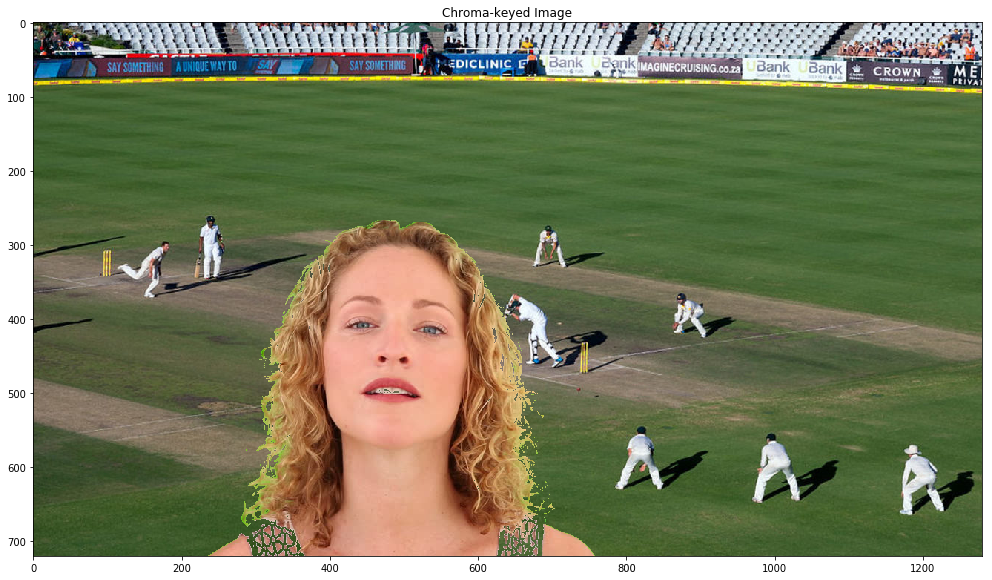

In [7]:
for i in range(chroma.shape[0]):
    for j in range(chroma.shape[1]):
        
        if chroma[i][j][1] >= 200:
            chroma[i][j] = ck[ck.shape[0]-chroma.shape[0]+i][j]

ck[ck.shape[0]-chroma.shape[0]:ck.shape[0], 0:chroma.shape[1]] = chroma

fig = plt.figure(figsize = (17,17))
plt.imshow(cv2.cvtColor(ck, cv2.COLOR_RGB2BGR))
plt.title("Chroma-keyed Image")
            

## Connected Components

Text(0.5, 1.0, 'Original (Thresholded)')

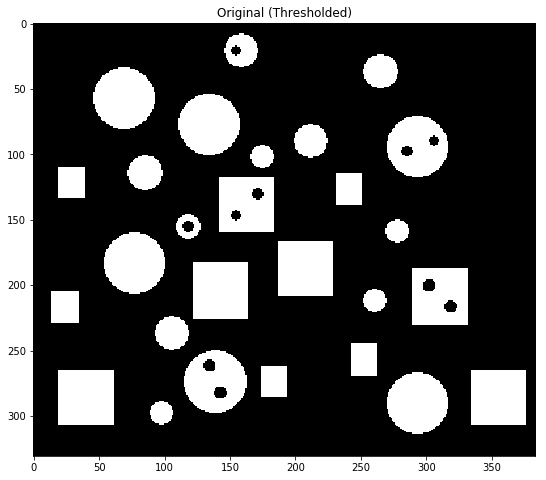

In [8]:
objs = cv2.imread("img/objects.png", cv2.IMREAD_GRAYSCALE)

_, thresh = cv2.threshold(objs, 125, 255, cv2.THRESH_BINARY)
_, thresh1 = cv2.threshold(objs, 125, 255, cv2.THRESH_BINARY_INV)

fig = plt.figure(figsize = (9,9))
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original (Thresholded)")

### No. of Objects with Holes

In [9]:
# answer is number of black components bounded by unique white components
def get_ngbhs(lb_img, r, c, curr):   
    nbh = []
    for i in range(0,2):
         for j in range(0,2):
                try:
                    if (lb_img[r+i][c+j] != curr):
                        nbh += [lb_img[r+i][c+j]]
                except:
                    pass
    return nbh

n_labels, lb_img, _, stats = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
n_labels_holes, lb_img1, _, stats1 = cv2.connectedComponentsWithStats(thresh1, 8, cv2.CV_32S)

added = set()
circles = n_labels

for i in range(len(lb_img)):
    for j in range(len(lb_img[0])):
        if lb_img[i][j] != 0:
            continue
        lb_img[i][j] = circles + lb_img1[i][j]

n_labels += n_labels_holes
bounded = [set() for i in range(n_labels)]

for r in range(len(lb_img)):
    for c in range(len(lb_img[0])):    
        curr = lb_img[r][c]
        ngbhs = get_ngbhs(lb_img, r, c, curr)
        for nbh in ngbhs:
            if nbh != 0 and nbh != circles+1:
                bounded[curr].add(nbh)

holed = set()
for i in range(circles):   
    if len(bounded[i]) >= 1 and i not in holed:
        holed.add(i)
print("Number of objects with holes =", len(holed))

Number of objects with holes = 6


### Number of Square Objects

Number of square objects = 11


Text(0.5, 1.0, 'Horizontal Lines of the Squares (Intermediate Step)')

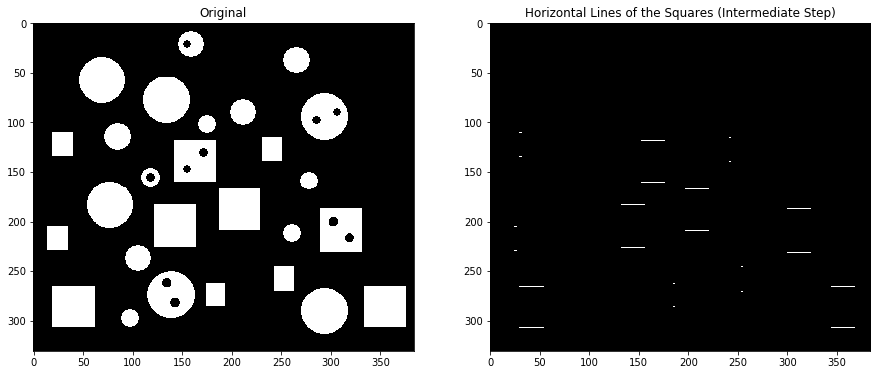

In [10]:
se = morp.rectangle(2,2)
e1 = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, se, iterations = 1)

se = morp.rectangle(1,20)
e2 = cv2.erode(e1, se)

n_labels,_,_,_ = cv2.connectedComponentsWithStats(e2, 8, cv2.CV_32S)
print("Number of square objects =", int((n_labels-1)/2))

fig = plt.figure(figsize = (15,9))
plt.subplot(121)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(e2, cv2.COLOR_RGB2BGR))
plt.title("Horizontal Lines of the Squares (Intermediate Step)")

### Display only Squares with Holes

Text(0.5, 1.0, 'Squares with Holes')

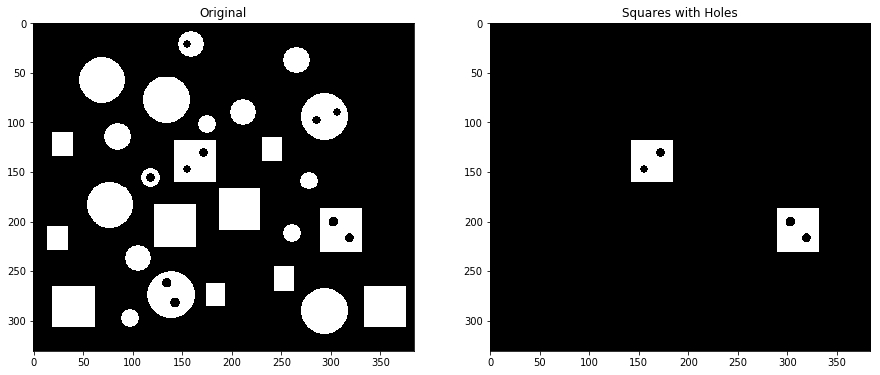

In [11]:
def has_hole(lims, holes):
    for hole in holes:
        if (hole[0] in range(lims[0], lims[1])) and hole[1] in range(lims[2], lims[3]):
            return 1
    return 0

se = morp.rectangle(2,2)
e1 = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, se, iterations = 1)
se = morp.rectangle(1,20)
e2 = cv2.erode(e1, se)
n_labels,mat,_,stats = cv2.connectedComponentsWithStats(e2, 8, cv2.CV_32S)

coords = [() for i in range(n_labels)]

for i in range(len(mat)):
    for j in range(len(mat[0])):
        curr = mat[i][j]   
        if coords[curr] == ():
            coords[curr] = (i,j)

n_labels_holes,mat2,_,stats2 = cv2.connectedComponentsWithStats(thresh1, 8, cv2.CV_32S)
holes = []
for i in stats2[1:]:
    holes += [(int(i[1]),int(i[0]))]
    
n_labels2,mat2,_,stats2 = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
to_display = set()

c_lims = [[400,0,400,0] for i in range(n_labels2)]
for i in range(len(mat2)):
    for j in range(len(mat2[0])):
        curr = mat2[i][j]
        if i < c_lims[curr][0]:
            c_lims[curr][0] = i
        if i > c_lims[curr][1]:
            c_lims[curr][1] = i
        if j < c_lims[curr][2]:
            c_lims[curr][2] = j
        if j > c_lims[curr][3]:
            c_lims[curr][3] = j  
            
for c in coords[1:]:
    if mat2[c[0]][c[1]] and has_hole(c_lims[mat2[c[0]][c[1]]], holes):
        to_display.add(mat2[c[0]][c[1]])

_, op = cv2.threshold(objs, 125, 255, cv2.THRESH_BINARY)
for i in range(len(op)):
    for j in range(len(op[0])):
        if mat2[i][j] not in to_display:
            op[i][j] = 0

fig = plt.figure(figsize = (15,9))
plt.subplot(121)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(op, cv2.COLOR_RGB2BGR))
plt.title("Squares with Holes")

### Display only Circles without Holes

Text(0.5, 1.0, 'Circles without Holes')

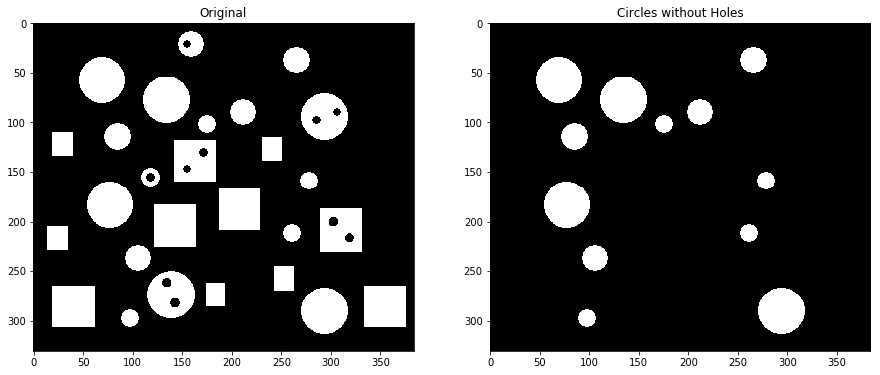

In [12]:
def has_hole(lims, holes):
    for hole in holes:
        if (hole[0] in range(lims[0], lims[1])) and hole[1] in range(lims[2], lims[3]):
            return 1
    return 0

se = morp.rectangle(2,2)
e1 = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, se, iterations = 1)
se = morp.rectangle(1,20)
e2 = cv2.erode(e1, se)
n_labels,mat,_,stats = cv2.connectedComponentsWithStats(e2, 8, cv2.CV_32S)

coords = [(int(stats[i][1]),int(stats[i][0])) for i in range(n_labels)]

n_labels_holes,mat2,_,stats2 = cv2.connectedComponentsWithStats(thresh1, 8, cv2.CV_32S)
holes = []
for i in stats2[1:]:
    holes += [(int(i[1]),int(i[0]))]
 
# add all rectangles to the holes list too
for i in coords:
    holes += [i]
    
n_labels2,mat2,_,stats2 = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
to_display = set()

c_lims = [[400,0,400,0] for i in range(n_labels2)]
for i in range(len(mat2)):
    for j in range(len(mat2[0])):
        curr = mat2[i][j]
        if i < c_lims[curr][0]:
            c_lims[curr][0] = i
        if i > c_lims[curr][1]:
            c_lims[curr][1] = i
        if j < c_lims[curr][2]:
            c_lims[curr][2] = j
        if j > c_lims[curr][3]:
            c_lims[curr][3] = j  
            
circle_coords = [(int(stats2[i][1]),int(stats2[i][0])) for i in range(n_labels2)]

for c in circle_coords[1:]:
    if mat2[c[0]][c[1]] and not has_hole(c_lims[mat2[c[0]][c[1]]], holes):
        to_display.add(mat2[c[0]][c[1]])

_, op = cv2.threshold(objs, 125, 255, cv2.THRESH_BINARY)
for i in range(len(op)):
    for j in range(len(op[0])):
        if mat2[i][j] not in to_display:
            op[i][j] = 0

fig = plt.figure(figsize = (15,9))
plt.subplot(121)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_RGB2BGR))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(op, cv2.COLOR_RGB2BGR))
plt.title("Circles without Holes")

### Counting Number of Components for Each Color in an Image

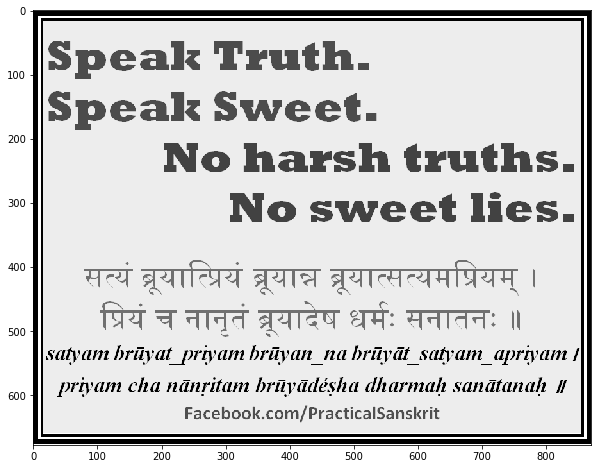

In [13]:
txt = cv2.imread("img/text2.png", cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(txt, cv2.COLOR_RGB2BGR))

Components in 1: 23
Components in 2: 27
Components in 3: 25
Components in 4: 84
Components in 5: 32


Text(0.5, 1.0, 'Color-5')

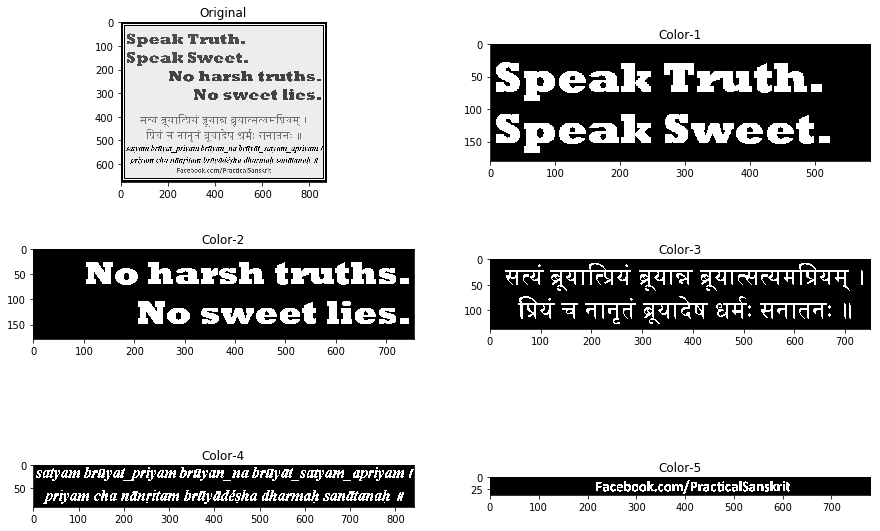

In [14]:
c1 = txt[20:200,14:600]
c2 = txt[180:360,100:855]
c3 = txt[380:518,50:800]
c4 = txt[518:610,14:855]
c5 = txt[608:645,20:800]

_, c1 = cv2.threshold(c1, 230, 255, cv2.THRESH_BINARY_INV)
n_labels1,_,s1,_ = cv2.connectedComponentsWithStats(c1, 8, cv2.CV_32S)
_, c2 = cv2.threshold(c2, 230, 255, cv2.THRESH_BINARY_INV)
n_labels2,_,_,_ = cv2.connectedComponentsWithStats(c2, 8, cv2.CV_32S)
_, c3 = cv2.threshold(c3, 230, 255, cv2.THRESH_BINARY_INV)
n_labels3,_,_,_ = cv2.connectedComponentsWithStats(c3, 8, cv2.CV_32S)
_, c4 = cv2.threshold(c4, 230, 255, cv2.THRESH_BINARY_INV)
n_labels4,_,_,_ = cv2.connectedComponentsWithStats(c4, 8, cv2.CV_32S)
_, c5 = cv2.threshold(c5, 230, 255, cv2.THRESH_BINARY_INV)
n_labels5,_,_,_ = cv2.connectedComponentsWithStats(c5, 8, cv2.CV_32S)

print("Components in 1:", n_labels1-1)
print("Components in 2:", n_labels2-1)
print("Components in 3:", n_labels3-1)
print("Components in 4:", n_labels4-1)
print("Components in 5:", n_labels5-1)

fig = plt.figure(figsize=(15,10))
plt.subplot(321)
plt.imshow(cv2.cvtColor(txt, cv2.COLOR_RGB2BGR))
plt.title("Original")
plt.subplot(322)
plt.imshow(cv2.cvtColor(c1, cv2.COLOR_RGB2BGR))
plt.title("Color-1")
plt.subplot(323)
plt.imshow(cv2.cvtColor(c2, cv2.COLOR_RGB2BGR))
plt.title("Color-2")
plt.subplot(324)
plt.imshow(cv2.cvtColor(c3, cv2.COLOR_RGB2BGR))
plt.title("Color-3")
plt.subplot(325)
plt.imshow(cv2.cvtColor(c4, cv2.COLOR_RGB2BGR))
plt.title("Color-4")
plt.subplot(326)
plt.imshow(cv2.cvtColor(c5, cv2.COLOR_RGB2BGR))
plt.title("Color-5")

# Image Translation, Rotation, Homography

In [15]:
boy = cv2.imread("img/boy_smiling.jpg")
boy = cv2.cvtColor(boy, cv2.COLOR_RGB2BGR)

### Translation Example

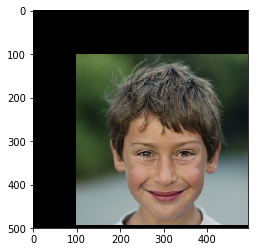

In [16]:
w, h, _ = boy.shape

T = np.array([
    [1,0,w/4],
    [0,1,h/4]
])
boy_t1 = cv2.warpAffine(boy, T, (w+100, h+100))

plt.imshow(boy_t1)

## Aligning Image

### Rotating Face to make it Straight

Text(0.5, 1.0, 'Original')

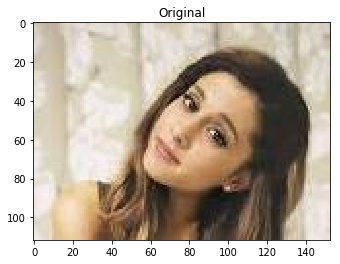

In [17]:
ag = cv2.imread("img/tilted_face.jpg")
ag = cv2.cvtColor(ag, cv2.COLOR_RGB2BGR)
w, h, _ = ag.shape
eye_r = (60, 95)
eye_l = (47, 78)
plt.imshow(ag)
plt.title("Original")

### Aligning and Scaling

Text(0.5, 1.0, 'Aligned, Translated & Scaled')

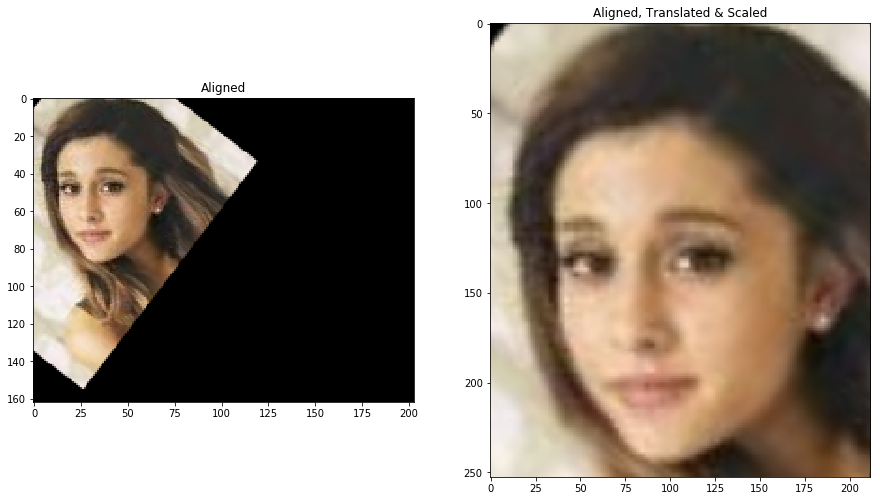

In [18]:
d = np.sqrt((eye_r[0] - eye_l[0])**2 + (eye_r[1] - eye_l[1])**2)
x_d = abs(eye_r[0] - eye_l[0])
r_angle = np.arccos(x_d/d)

T = cv2.getRotationMatrix2D((h/2-20, w/2+50), math.degrees(r_angle), 1.0)
aligned1 = cv2.warpAffine(ag, T, (h+50, w+50))
T = np.array([[2.8,0,0],[0,2.8,0]]).astype('float32')
aligned2 = cv2.warpAffine(aligned1, T, (w+100, h+100))

fig = plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(aligned1)
plt.title("Aligned")
plt.subplot(122)
plt.imshow(aligned2)
plt.title("Aligned, Translated & Scaled")

## Homography

### Inserting Banner onto the Field

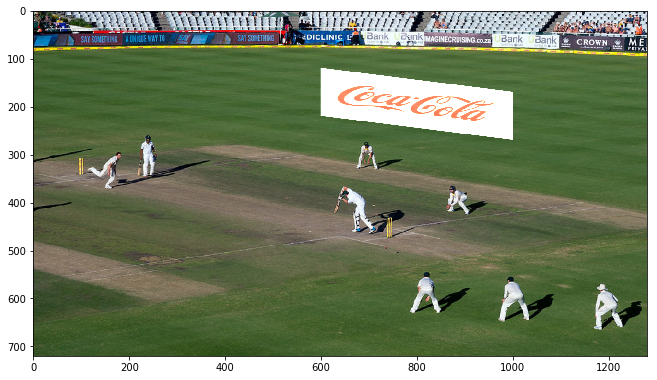

In [19]:
ck = cv2.imread("img/stadium.jpg")
coke = cv2.imread("img/coca.jpg")

pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords

h, w, _ = ck.shape

H, status = cv2.findHomography(pts1, pts2)
coke_warp = cv2.warpPerspective(coke, H, (ck.shape[1], ck.shape[0]))

res = cv2.add(ck, coke_warp)

fig = plt.figure(figsize = (11,11))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_RGB2BGR))